In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

#### ***data set ini berisi informasi terkait kepribadian pelanggan dilihat dari kebutuhan, perilaku, dan perhatian pelanggan ketika berbelanja disuatu perusahaan. Ada 29 kolom di dalam data set marketing_campaign, yaitu:***

### People ###

- ID: Kode unik pelanggan
- Year_Birth: Tahun lahir pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status pernikahan pelanggan
- Income: Pendapatan rumah tangga tahunan pelanggan
- Kidhome: Jumlah anak dalam rumah tangga pelanggan
- Teenhome: Jumlah remaja dalam rumah tangga pelanggan
- Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan
- Recency: Jumlah hari sejak pembelian terakhir pelanggan
- Complain: jika 1 pelanggan mengeluh dalam 2 tahun terakhir

### Products ###

- MntWines: Jumlah yang dihabiskan untuk minuman anggur dalam 2 tahun terakhir
- MntFruits: Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir
- MntMeatProducts: Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
- MntFishProducts: Jumlah yang dihabiskan untuk membeli ikan dalam 2 tahun terakhir
- MntSweetProducts: Jumlah yang dihabiskan untuk permen dalam 2 tahun terakhir
- MntGoldProds: Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir

### Promotion ###

- NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1: Jika 1 pelanggan menerima penawaran pada kampanye pertama
- AcceptedCmp2: Jika 1 pelanggan menerima penawaran pada kampanye kedua
- AcceptedCmp3: Jika 1 pelanggan menerima penawaran pada kampanye ketiga
- AcceptedCmp4: Jika 1 pelanggan menerima penawaran pada kampanye keempat
- AcceptedCmp5: Jika 1 pelanggan menerima penawaran pada kampanye kelima
- Z_CostContact: tidak diketahui
- Z_Revenue: tidak diketaui
- Response: Jika 1 pelanggan menerima penawaran pada kampanye terakhir

### Place ###

- NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
- NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

### Target ###

## ***Need to perform clustering to summarize customer Analysist.



Menampilkan data set marketing_campaign.csv dimana data masih berupa data mentah dalam satu baris yang tergabung dengan fungsi tab (\t) sehingga harus dipisahkan dengan parameter sep. Dan menampilkan data 5 index teratas (head) dan 5 index terakhir (tail)

In [122]:
df=pd.read_csv('marketing_campaign.csv', sep='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


## Data Cleaning

Pada data yang ada, kita harus melakukan pengecekan terlebih dahulu sebelum diolah. Maka kita akan memperbaiki semua datanya dan membuatnya menjadi siap pakai untuk melakukan analisa terhadap masalahnya dan juga pembuatan model machine learningnya.

Langkah awal yaitu kita menampilkan rangkuman dari Data Frame yang sedang diproses, sehingga kita dapat melihat banyaknya kolom, tipe-data tiap kolom, banyaknya baris data sampai alokasi memori

In [123]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

Pada dataset tersebut terdapat 2240 baris dan 29 kolom

Selanjutnya akan dilakukan pengecekan data yang duplikat

In [124]:
result_df = df.drop_duplicates(subset=['ID'], keep='first')
print(result_df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

In [125]:
df.duplicated().sum()

0

Pada pengecekan data sudah dipastikan tidak ada data yang duplikat dikarenakan saat pengecekan dataset, total kolom & baris jumlahnya masih sama.

Selanjutnya akan dilakukan pengecekan data yang kosong pada Data Frame.

In [126]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Pada hasil pengecekan data terdata kosong pada kolom income sebanyak 24 baris.

Selanjutnya kita akan menghapus data yang kosong pada file tersebut

In [127]:
df = df.dropna()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [128]:
#Total data pada penawaran pertama
# 0 Berarti yang tidak menerima penawaran pada kampanye pertama
# 1 Berarti yang menerima penawaran pada kampanye pertama
df["AcceptedCmp1"].value_counts()

0    2074
1     142
Name: AcceptedCmp1, dtype: int64

In [129]:
#Total data pada penawaran kedua
# 0 Berarti yang tidak menerima penawaran pada kampanye kedua
# 1 Berarti yang menerima penawaran pada kampanye kedua
df["AcceptedCmp2"].value_counts()

0    2186
1      30
Name: AcceptedCmp2, dtype: int64

In [130]:
#Total data pada penawaran ketiga
# 0 Berarti yang tidak menerima penawaran pada kampanye ketiga
# 1 Berarti yang menerima penawaran pada kampanye ketiga
df["AcceptedCmp3"].value_counts()

0    2053
1     163
Name: AcceptedCmp3, dtype: int64

In [131]:
#Total data pada penawaran keempat
# 0 Berarti yang tidak menerima penawaran pada kampanye keempat
# 1 Berarti yang menerima penawaran pada kampanye keempat
df["AcceptedCmp4"].value_counts()

0    2052
1     164
Name: AcceptedCmp4, dtype: int64

In [132]:
#Total data pada penawaran kelima
# 0 Berarti yang tidak menerima penawaran pada kampanye kelima
# 1 Berarti yang menerima penawaran pada kampanye kelima
df["AcceptedCmp5"].value_counts()

0    2054
1     162
Name: AcceptedCmp5, dtype: int64

In [133]:
#Total data pada penawaran terakhir
# 0 Berarti yang tidak menerima penawaran pada kampanye terakhir
# 1 Berarti yang menerima penawaran pada kampanye terakhir
df["Response"].value_counts()

0    1883
1     333
Name: Response, dtype: int64

In [134]:
df.shape

(2216, 29)

Setelah dilakukan pengecekan terdapat pengurangan 24 baris data, dari data kosong yang telah dihapus. Sehingga total barisnya menjadi 2216 baris dan kolom tetap menjadi 29 baris.

Selanjutnya akan dilakukan perapihan data & kolom pada dataframe. Dengan melakukan penambahan / meringkas kolom yang ada ;
- Age = merupakan kolom berisi umur setiap pembeli dengan melakukan pengurangan tanggal dengan parameter tahun 2022 dikurang data tanggal pada kolom Year_Birth
= Spent = merupakan gabungan dari data belanjaan pada kolom jumlah produk minuman angur (MntWines) ditambah jumlah produk buah-buahan (MntFruits) ditambah jumlah produk daging (MeatProducts) ditambah jumlah produk ikan (MntFishProducts) ditambah jumlah produk permen (MntSweetProducts) ditambah jumlah produk emas (MntGoldProds) yang dibeli dalam kurun 2 tahun terakhir
- Living_With = merupakan kolom yang meringkas data pada kolom Marital_Status dengan merubah status Married dan Together menjadi Partner, merubah status Absurd, Widow, YOLO, Dovorced, dan Single menjadi Alone
- Children = merupakan kolom yang menghitung jumlah data pada kolom Kidhome ditambah data pada kolom Teenhome
- PurchaseNum = merupakan kolom yang berisi gabungan jumlah pembelian dari kolom pembelian secara web (NumWebPurchases) ditambah jumlah pembelian dari kolom pembelian secara katalog (NumCatalogPurchases) ditambah jumlah pembelian dari kolom pembelian secara langsung di store (NumStorePurchases)
- Family_Size = merupakan jumlah anggota keluarga yang diambil data dari kolom Living_With dengan ketentuan jika statusnya Alone jumlah keluarga totalnya 1, jika statusnya Partner jumlah keluarga totalnya jadi 2, ditambah total anak dari kolom Children

- Selanjutnya memperbaiki tampilan kolom dari kolom MntWines menjadi Wines, kolom MntFruits menjadi Fruits, kolom MntMeatProducts menjadi Meat,kolom MntFishProducts menjadi Fish, kolom MntSweetProducts menjadi Sweets, kolom MntGoldProds menjadi Gold

In [135]:
df["Age"] = 2022-df["Year_Birth"]
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df["Offering_Discount"]=df["AcceptedCmp1"].replace({"1":"1"}) + df["AcceptedCmp2"].replace({"1":"1"}) + df["AcceptedCmp3"].replace({"1":"1"}) + df["AcceptedCmp4"].replace({"1":"1"}) + df["AcceptedCmp5"].replace({"1":"1"}) + df["Response"].replace({"1":"1"})
df["Children"] = df["Kidhome"] + df["Teenhome"]
df["PurchaseNum"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Offering_Discount,Children,PurchaseNum,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,3,11,1,65,1617,Alone,1,0,22,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,3,11,0,68,27,Alone,0,2,4,3
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,3,11,0,57,776,Partner,0,0,20,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,3,11,0,38,53,Partner,0,1,6,3
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,11,0,41,422,Partner,0,1,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,11,0,55,1341,Partner,0,1,16,3
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,3,11,0,76,444,Partner,1,3,15,5
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,11,0,41,1241,Alone,1,0,18,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,11,0,66,843,Partner,0,1,21,3


Menghapus kolom yang tidak diperlukan dengan parameter to_drop pada kolom "Dt_Customer", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response", "Z_CostContact", "Z_Revenue", "Year_Birth"

In [136]:
to_drop = [ "Dt_Customer", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response", "Z_CostContact", "Z_Revenue", "Year_Birth"]
df = df.drop(to_drop, axis=1)
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,...,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Spent,Living_With,Offering_Discount,Children,PurchaseNum,Family_Size
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,65,1617,Alone,1,0,22,1
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,68,27,Alone,0,2,4,3
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,57,776,Partner,0,0,20,2
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,38,53,Partner,0,1,6,3
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,41,422,Partner,0,1,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,46,709,43,182,...,4,5,0,55,1341,Partner,0,1,16,3
2236,4001,PhD,Together,64014.0,2,1,56,406,0,30,...,5,7,0,76,444,Partner,1,3,15,5
2237,7270,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,13,6,0,41,1241,Alone,1,0,18,1
2238,8235,Master,Together,69245.0,0,1,8,428,30,214,...,10,3,0,66,843,Partner,0,1,21,3


In [137]:
# Menampilkan 20 baris awal

display(df.head(20))

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,...,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Spent,Living_With,Offering_Discount,Children,PurchaseNum,Family_Size
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,65,1617,Alone,1,0,22,1
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,68,27,Alone,0,2,4,3
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,57,776,Partner,0,0,20,2
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,38,53,Partner,0,1,6,3
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,41,422,Partner,0,1,14,3
5,7446,Master,Together,62513.0,0,1,16,520,42,98,...,10,6,0,55,716,Partner,0,1,20,3
6,965,Graduation,Divorced,55635.0,0,1,34,235,65,164,...,7,6,0,51,590,Alone,0,1,17,2
7,6177,PhD,Married,33454.0,1,0,32,76,10,56,...,4,8,0,37,169,Partner,0,1,8,3
8,4855,PhD,Together,30351.0,1,0,19,14,0,24,...,2,9,0,48,46,Partner,1,1,5,3
9,5899,PhD,Together,5648.0,1,1,68,28,0,6,...,0,20,0,72,49,Partner,1,2,1,4


In [138]:
#Menampilkan deskristip data pada dataset

df.describe().T, df.describe(include='object').T

(                      count          mean           std     min       25%  \
 ID                   2216.0   5588.353339   3249.376275     0.0   2814.75   
 Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
 Kidhome              2216.0      0.441787      0.536896     0.0      0.00   
 Teenhome             2216.0      0.505415      0.544181     0.0      0.00   
 Recency              2216.0     49.012635     28.948352     0.0     24.00   
 Wines                2216.0    305.091606    337.327920     0.0     24.00   
 Fruits               2216.0     26.356047     39.793917     0.0      2.00   
 Meat                 2216.0    166.995939    224.283273     0.0     16.00   
 Fish                 2216.0     37.637635     54.752082     0.0      3.00   
 Sweets               2216.0     27.028881     41.072046     0.0      1.00   
 Gold                 2216.0     43.965253     51.815414     0.0      9.00   
 NumDealsPurchases    2216.0      2.323556      1.923716     0.0

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **bagaimana karakteristik pelanggan yang berbelanja**.  

Analisis akan dilakukan dengan membandingkan data status pernikahan(Marital_Status) dimana dari total 2216 orang ada 1430 orang yang total pendapatannya bersama pasangannya dan 786 orang yang pendapatannya secara mandiri dengan latar belakang pendidikan yang berbeda-beda

In [139]:
df['Living_With'].value_counts()

Partner    1430
Alone       786
Name: Living_With, dtype: int64

In [140]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

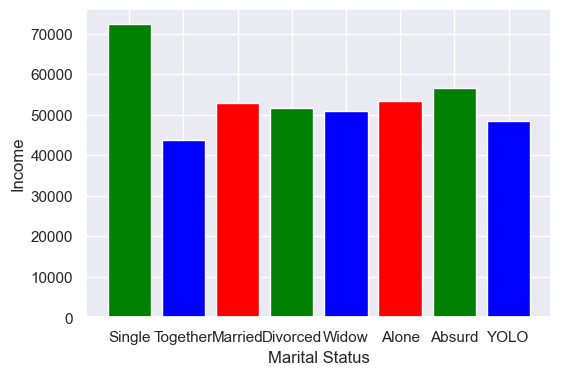

In [162]:
df1 = df[['Income', 'Marital_Status']].groupby(['Marital_Status']).mean()
x = df['Marital_Status'].unique().tolist()
y = df1['Income']

plt.figure(figsize = (6,4))
plt.bar(x, y, color=['green', 'blue', 'red'])
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.show()

<AxesSubplot:xlabel='Income', ylabel='Marital_Status'>

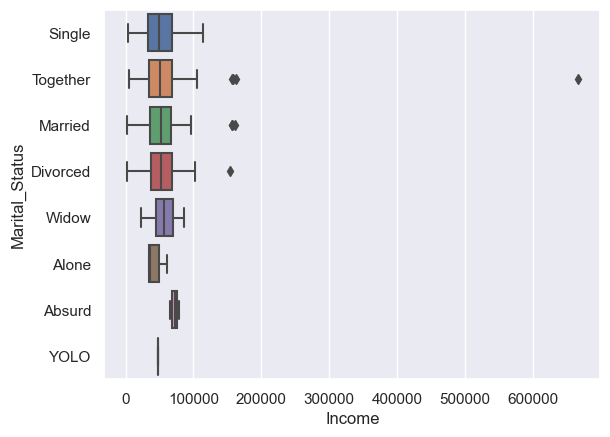

In [163]:
sns.boxplot(x=df['Income'], y='Marital_Status', data=df)

In [146]:
#Total data Pendidikan pada setiap baris tipe Status Tanggungjawab

dftot = pd.crosstab(df['Living_With'], df['Education'],normalize='index')
dftot['Income']=dftot.sum(axis=1)
dftot.sort_values('Income',ascending=False).head(10)


Education,2n Cycle,Basic,Graduation,Master,PhD,Income
Living_With,,,,,,
Alone,0.081425,0.025445,0.511450,0.159033,0.222646,1.0
Partner,0.095105,0.023776,0.499301,0.167832,0.213986,1.0


In [147]:
# Uji Normalitas dengan Shapiro Wilk
from scipy.stats import shapiro

print('Hipotesis')
print('Ho : Data terdistribusi normal')
print('Ha : Data TIDAK terdistribusi normal')

stat, pval_shapiro1 = shapiro(df['Income'])

print(f'p-value = {pval_shapiro1:.5f} ')

if pval_shapiro1 < 0.05 :
    print (f'Nilai p-value <= 0.05, Reject Ho')
else :
    print (f'Nilai p-value >  0.05, Fail to Reject Ho')

Hipotesis
Ho : Data terdistribusi normal
Ha : Data TIDAK terdistribusi normal
p-value = 0.00000 
Nilai p-value <= 0.05, Reject Ho


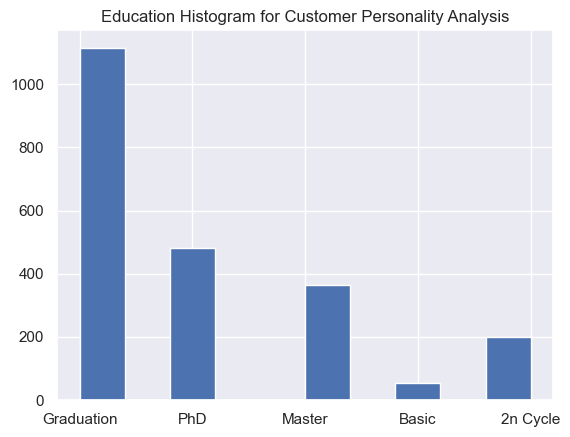

In [148]:
plt.hist(df['Education'])
plt.title('Education Histogram for Customer Personality Analysis')
plt.show()

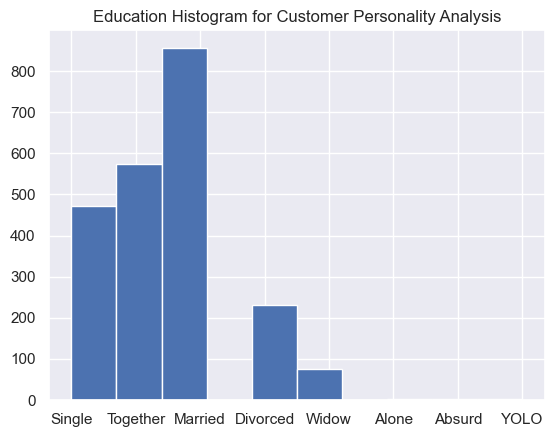

In [149]:
plt.hist(df['Marital_Status'])
plt.title('Education Histogram for Customer Personality Analysis')
plt.show()

In [150]:
### **Cek normalitas pada category Education**

# Pendapatan pada lulusan
stat, pval_shapiro1 = shapiro(df[df['Education']=='Graduation']['Income'])
print(f'p-value = {pval_shapiro1:.5f} ')

p-value = 0.00000 


Text(0.5, 1.0, 'Income Displot for Customer Personality Analysis')

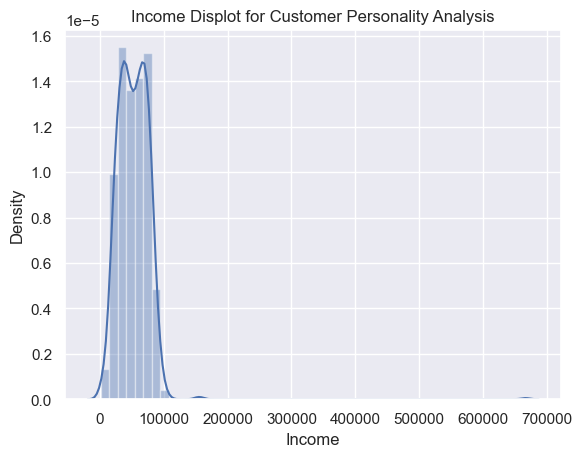

In [151]:
sns.distplot(df[df['Education']=='Graduation']['Income']);
plt.title('Income Displot for Customer Personality Analysis')

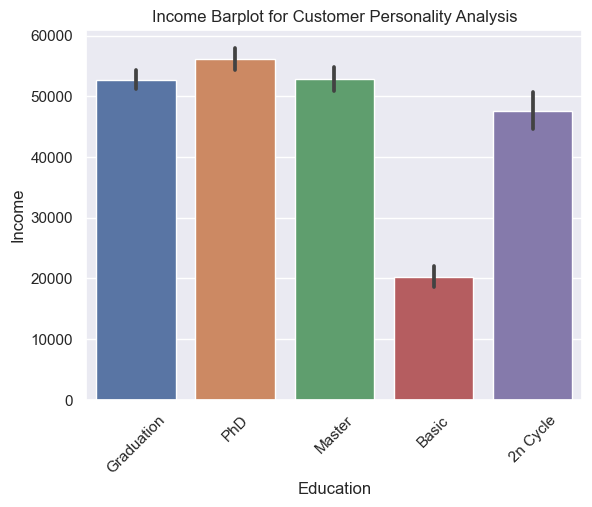

In [152]:
# Menampilkan visualisasi Education berdasarkan Pendapatan

sns.barplot(data=df, x='Education', y='Income')
plt.title('Income Barplot for Customer Personality Analysis')
plt.xticks(rotation=45)
plt.show()

In [153]:
# Sum of kind of education
df['Education'].nunique()

5

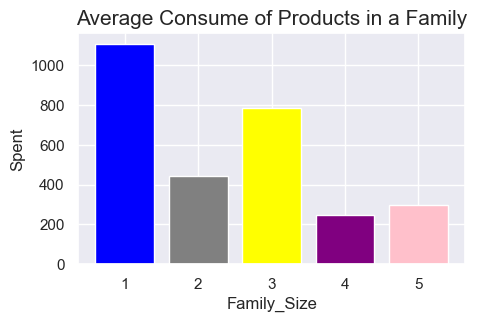

In [154]:
IncomebyEducation = df[['Spent', 'Family_Size']].groupby(['Family_Size']).mean()

x = df['Family_Size'].unique().tolist()
y = IncomebyEducation['Spent']

plt.figure(figsize = (5,3))
plt.bar(x, y, color=['blue','yellow', 'grey', 'purple', 'pink', 'red','cyan'])
plt.title('Average Consume of Products in a Family', size = 15)
plt.xlabel('Family_Size')
plt.ylabel('Spent')
plt.show()

In [155]:
# Sum of kind of education
df['Family_Size'].nunique()

5

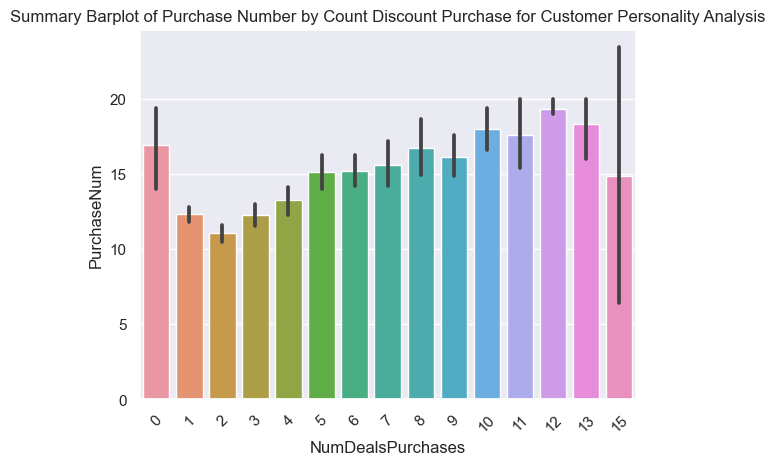

In [156]:
# Menampilkan visualisasi Education berdasarkan Pendapatan

sns.barplot(data=df, x='NumDealsPurchases', y='PurchaseNum')
plt.title('Summary Barplot of Purchase Number by Count Discount Purchase for Customer Personality Analysis')
plt.xticks(rotation=45)
plt.show()

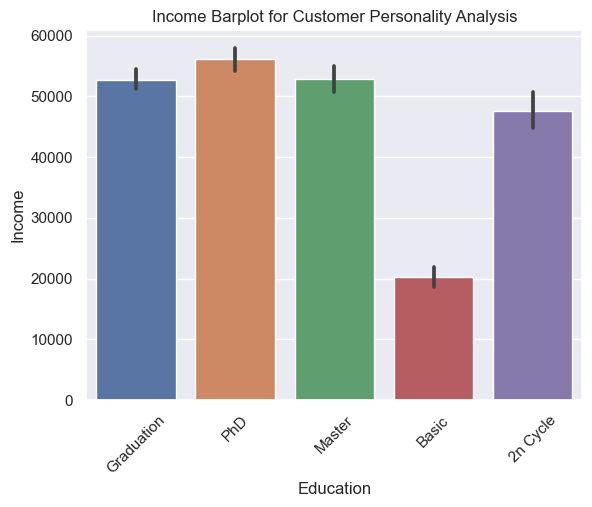

In [157]:
# Menampilkan visualisasi Education berdasarkan Pendapatan

sns.barplot(data=df, x='Education', y='Income')
plt.title('Income Barplot for Customer Personality Analysis')
plt.xticks(rotation=45)
plt.show()

In [158]:
df.corr(method='spearman')

,ID,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Spent,Offering_Discount,Children,PurchaseNum,Family_Size
ID,1.000000,0.004250,0.000691,-0.003798,-0.043935,-0.024931,-0.020197,-0.013629,-0.029754,-0.032802,...,-0.011334,-0.021991,-0.011906,0.034487,-0.005013,-0.025393,-0.034172,-0.000311,-0.016234,0.011627
Income,0.004250,1.000000,-0.559909,0.045909,0.007938,0.830056,0.582379,0.816815,0.577392,0.567087,...,0.791841,0.731752,-0.643667,-0.030868,0.217063,0.850920,0.311428,-0.375991,0.777879,-0.303200
Kidhome,0.000691,-0.559909,1.000000,-0.049211,0.009111,-0.580712,-0.452910,-0.551080,-0.453811,-0.442766,...,-0.598966,-0.557366,0.481408,0.040367,-0.261818,-0.615541,-0.179103,0.671380,-0.584269,0.564272
Teenhome,-0.003798,0.045909,-0.049211,1.000000,0.007451,0.110354,-0.202097,-0.128053,-0.232618,-0.199683,...,-0.046041,0.076381,0.108552,0.001124,0.383419,-0.056405,-0.146966,0.697694,0.043600,0.585661
Recency,-0.043935,0.007938,0.009111,0.007451,1.000000,0.016824,0.024804,0.026241,0.013278,0.024220,...,0.028665,0.003791,-0.018666,0.013689,0.017089,0.018856,-0.104581,0.012781,0.011907,0.013333
Wines,-0.024931,0.830056,-0.580712,0.110354,0.016824,1.000000,0.516551,0.824089,0.522182,0.505361,...,0.822926,0.805352,-0.390695,-0.038470,0.234700,0.928394,0.383265,-0.335959,0.869071,-0.275497
Fruits,-0.020197,0.582379,-0.452910,-0.202097,0.024804,0.516551,1.000000,0.713574,0.704316,0.691066,...,0.633081,0.582166,-0.444309,-0.012408,0.025921,0.683442,0.172154,-0.470760,0.627295,-0.403346
Meat,-0.013629,0.816815,-0.551080,-0.128053,0.026241,0.824089,0.713574,1.000000,0.725851,0.697815,...,0.853744,0.779894,-0.493880,-0.025347,0.113229,0.940218,0.308393,-0.491675,0.864788,-0.405455
Fish,-0.029754,0.577392,-0.453811,-0.232618,0.013278,0.522182,0.704316,0.725851,1.000000,0.700131,...,0.655878,0.580711,-0.459944,-0.029041,0.029839,0.694671,0.149492,-0.496558,0.632165,-0.416419
Sweets,-0.032802,0.567087,-0.442766,-0.199683,0.024220,0.505361,0.691066,0.697815,0.700131,1.000000,...,0.627996,0.581463,-0.448658,-0.025932,-0.002081,0.669823,0.167090,-0.464267,0.625363,-0.381186


Text(0.5, 1.0, 'Correlation Data in a Table')

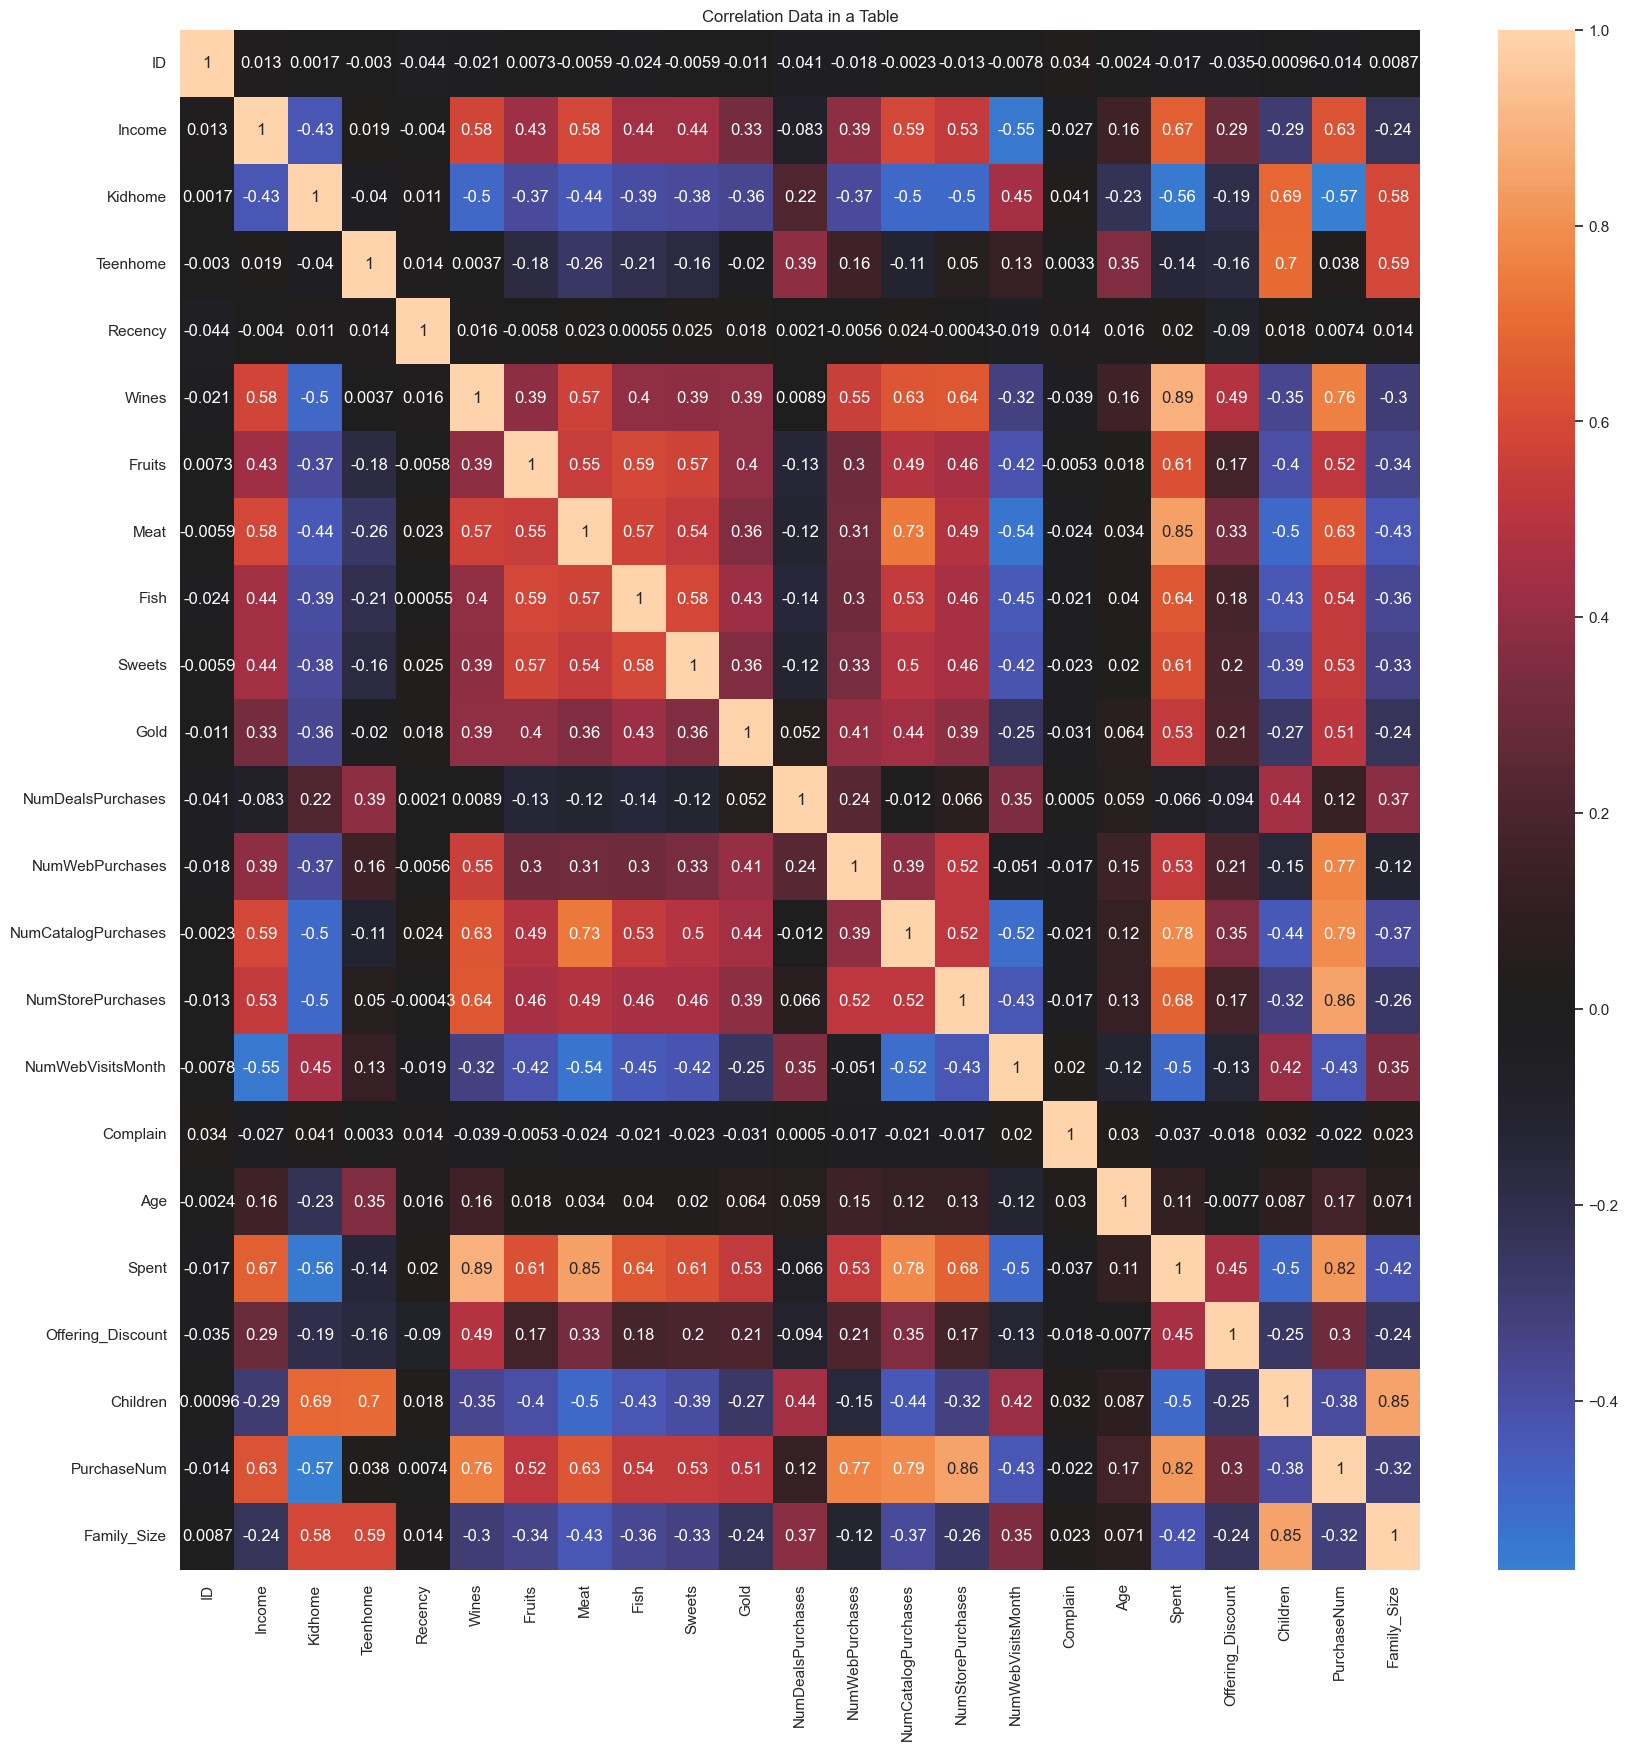

In [159]:
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)
plt.title('Correlation Data in a Table')

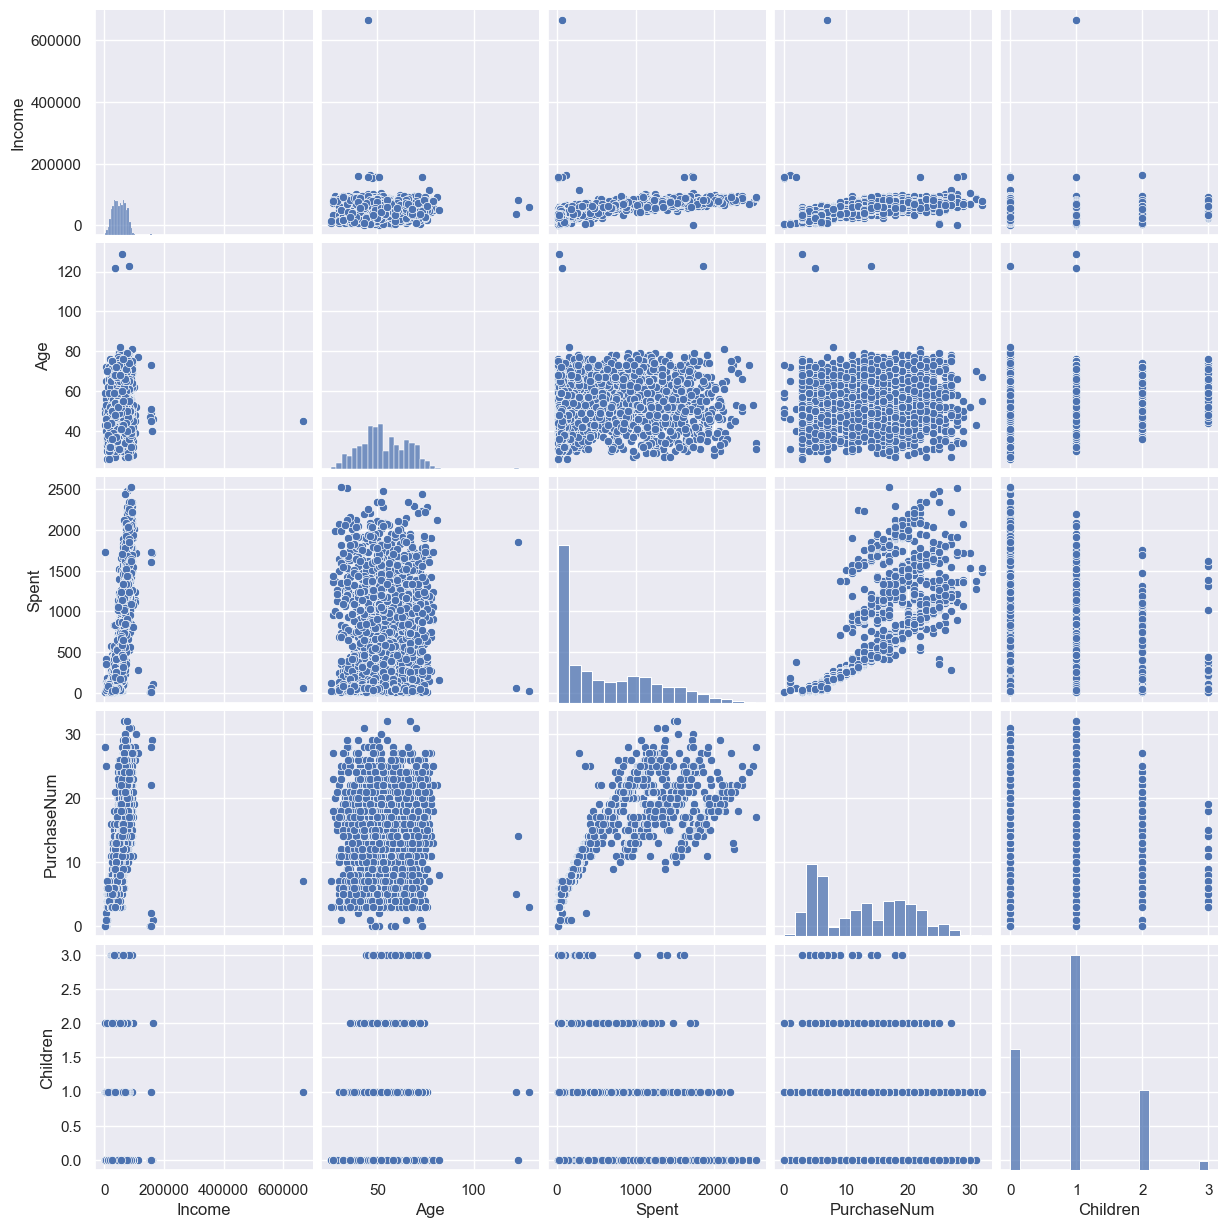

In [160]:
cols_to_plot = ["Income", "Age", "Spent", "PurchaseNum", "Children"]
sns.set_theme()

sns.pairplot(df[cols_to_plot])